In [17]:
f=open("/content/titles (1).txt","r")

In [18]:
NonNullStr=[]

In [19]:
for s in f:
  NonNullStr.append(s)

In [20]:
NonNullStr

['Start and grow your e-commerce business - 3-Day Free Trial - Shopify India\n',
 '      Buy Earbuds, Headphones, Earphones at India’s No.1 Earwear Brand: boAt\n',
 '    Bluetooth Calling Smartwatch | Wireless Earbuds | Headphones\n',
 '– Hammer\n',
 '\n',
 "  Noise | India's No.1 Wearable Watch Brand\n",
 '  \n',
 '  \n',
 '  \n',
 'Wow Skin Science IndiaBummer | Soft Most Comfortable Underwear & Loungewear For Men & Women\n',
 'Urban Monkey® | Streetwear Clothing BrandOberlo | Where Self Made is MadeBuy Refurbished Mobile Phone online in India at best price | cashify.inLinkpop by Shopify: the link in bio tool for commerce in 2023504 Gateway Time-outBuy Plants, Seeds, Pots, Garden Decor @ lowest price — NurseryliveFRENCH CROWN® India : Men and Women Premium Clothing Store\n',
 '    Traditional & Contemporary Clothing – Bunaai\n',
 "  Headphone Zone: Rediscover Music at India's #1 Audiophile Store\n",
 '      Nicobar | Modern, mindful, India-rooted designs\n',
 '    Organic & Naturopon

In [32]:
for s in NonNullStr:
  temp=s.split()
  flag=0
  for x in temp:
    if x not in [' ','\n']:
      flag=1
      break
  if flag==0:
    NonNullStr.remove(s)


In [33]:
NonNullStr

['Start and grow your e-commerce business - 3-Day Free Trial - Shopify India\n',
 '      Buy Earbuds, Headphones, Earphones at India’s No.1 Earwear Brand: boAt\n',
 '    Bluetooth Calling Smartwatch | Wireless Earbuds | Headphones\n',
 '– Hammer\n',
 "  Noise | India's No.1 Wearable Watch Brand\n",
 'Wow Skin Science IndiaBummer | Soft Most Comfortable Underwear & Loungewear For Men & Women\n',
 'Urban Monkey® | Streetwear Clothing BrandOberlo | Where Self Made is MadeBuy Refurbished Mobile Phone online in India at best price | cashify.inLinkpop by Shopify: the link in bio tool for commerce in 2023504 Gateway Time-outBuy Plants, Seeds, Pots, Garden Decor @ lowest price — NurseryliveFRENCH CROWN® India : Men and Women Premium Clothing Store\n',
 '    Traditional & Contemporary Clothing – Bunaai\n',
 "  Headphone Zone: Rediscover Music at India's #1 Audiophile Store\n",
 '      Nicobar | Modern, mindful, India-rooted designs\n',
 '    Organic & Naturoponic Farm In Bangalore, Chennai, Hyd

In [35]:
len(NonNullStr)

702

In [40]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from numpy.linalg import norm
import networkx as nx
import scipy as scipy
import math
import random

In [38]:
!pip install nltk

In [42]:


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [43]:
stopWords = set(stopwords.words('english'))

In [44]:
import string
preprocessed_sentences = []
for s in NonNullStr:
    res=""
    for c in s:
       if c not in string.punctuation:
           res+=c


    if res!="":
       words = word_tokenize(res)


    fwords = []
    for word in words:
        if word not in stopWords:
            fwords.append(WordNetLemmatizer().lemmatize(word) )


    ps=""
    ind=1
    for w in fwords:
        if ind!=len(fwords):
            ps+=(w+' ')
        else:
            ps+=w
        ind=ind+1

    preprocessed_sentences.append(ps)

In [45]:
preprocessed_sentences

['Start grow ecommerce business 3Day Free Trial Shopify India',
 'Buy Earbuds Headphones Earphones India ’ No1 Earwear Brand boAt',
 'Bluetooth Calling Smartwatch Wireless Earbuds Headphones',
 '– Hammer',
 'Noise Indias No1 Wearable Watch Brand',
 'Wow Skin Science IndiaBummer Soft Most Comfortable Underwear Loungewear For Men Women',
 'Urban Monkey® Streetwear Clothing BrandOberlo Where Self Made MadeBuy Refurbished Mobile Phone online India best price cashifyinLinkpop Shopify link bio tool commerce 2023504 Gateway TimeoutBuy Plants Seeds Pots Garden Decor lowest price — NurseryliveFRENCH CROWN® India Men Women Premium Clothing Store',
 'Traditional Contemporary Clothing – Bunaai',
 'Headphone Zone Rediscover Music Indias 1 Audiophile Store',
 'Nicobar Modern mindful Indiarooted design',
 'Organic Naturoponic Farm In Bangalore Chennai Hyderabad MumbaiGIVA Jewellery Buy Affordable Silver Jewellery Online GIVA Jewel boAt Support',
 'Great Food Great Nutrition',
 '– FabBox',
 'Buy Shoes

In [46]:
for s in preprocessed_sentences:
  if s =='':
    preprocessed_sentences.remove(s)

In [47]:
preprocessed_sentences

['Start grow ecommerce business 3Day Free Trial Shopify India',
 'Buy Earbuds Headphones Earphones India ’ No1 Earwear Brand boAt',
 'Bluetooth Calling Smartwatch Wireless Earbuds Headphones',
 '– Hammer',
 'Noise Indias No1 Wearable Watch Brand',
 'Wow Skin Science IndiaBummer Soft Most Comfortable Underwear Loungewear For Men Women',
 'Urban Monkey® Streetwear Clothing BrandOberlo Where Self Made MadeBuy Refurbished Mobile Phone online India best price cashifyinLinkpop Shopify link bio tool commerce 2023504 Gateway TimeoutBuy Plants Seeds Pots Garden Decor lowest price — NurseryliveFRENCH CROWN® India Men Women Premium Clothing Store',
 'Traditional Contemporary Clothing – Bunaai',
 'Headphone Zone Rediscover Music Indias 1 Audiophile Store',
 'Nicobar Modern mindful Indiarooted design',
 'Organic Naturoponic Farm In Bangalore Chennai Hyderabad MumbaiGIVA Jewellery Buy Affordable Silver Jewellery Online GIVA Jewel boAt Support',
 'Great Food Great Nutrition',
 '– FabBox',
 'Buy Shoes

In [48]:
len(preprocessed_sentences)

697

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
vectorizer = TfidfVectorizer()

In [51]:
tfidfMatrix = vectorizer.fit_transform(preprocessed_sentences)

In [56]:
tfidArray=tfidfMatrix.toarray()

In [61]:
tfidArray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
tfidfMatrix

<697x2105 sparse matrix of type '<class 'numpy.float64'>'
	with 5088 stored elements in Compressed Sparse Row format>

In [62]:
import numpy as np
def find_if_close(list1,list2):
    return np.allclose(list1,list2)

In [67]:
tfid_matrix=tfidArray.tolist()

In [71]:
cluster_ans=[]
k=20
centroids=random.sample(tfid_matrix,k)
n=len(centroids)
while True:
    clusters=[]
    clusters_id=[]
    for i in range(n):
        clusters.append([])
        clusters_id.append([])
    for v in range(len(tfidArray)):
        similarities=[]
        for centr in centroids:
            cosine = np.dot(tfidArray[v],centr)/(norm(tfidArray[v], axis=0)*norm(centr))
            similarities.append(cosine)
        closest_cluster = np.argmax(similarities)
        clusters[closest_cluster].append(tfidArray[v])
        clusters_id[closest_cluster].append(v)
    centroids_modified=[]
    for cluster in clusters:
        centroids_modified.append(np.mean(cluster,axis=0))
    #(centroids_modi
    # fied.all()).sort()
    if find_if_close(centroids,centroids_modified):
        break
    centroids=centroids_modified
    cluster_ans=clusters
    #max_iter-=1

<ipython-input-71-881450b3e167>:14: RuntimeWarning: invalid value encountered in double_scalars
  cosine = np.dot(tfidArray[v],centr)/(norm(tfidArray[v], axis=0)*norm(centr))


In [72]:
for cluster in clusters:
   print(cluster)
   print('\n')

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 

In [74]:
def constructGraph(str1, str2):
    # Initialize the graph with start and end nodes.
    graph = {
        "start": [],
        "end": []
    }

    # Tokenize the sentences into bigrams.
    bigrams1=[]
    bigrams2=[]
    temp1=str1.split()
    for i in range(len(temp1)-1):
        bigrams1.append(tuple(temp1[i:i+2]))
    if str2:
        temp2=str2.split()
        for i in range(len(temp2)-1):
            bigrams2.append(tuple(temp1[i:i+2]))
    # Add nodes for bigrams and edges to/from start and end nodes.
    for bigram in bigrams1:
        if bigram not in graph:
            graph[bigram] = []
        if bigram == bigrams1[0]:
            graph["start"].append(bigram)
        if bigram == bigrams1[-1]:
            graph[bigram].append("end")

    for bigram in bigrams2:
        if bigram not in graph:
            graph[bigram] = []
        if bigram == bigrams2[0]:
            graph["start"].append(bigram)
        if bigram == bigrams2[-1]:
            graph[bigram].append("end")

    # Add edges between consecutive bigrams.
    for i in range(0,len(bigrams1) - 1):
        graph[bigrams1[i]].append(bigrams1[i + 1])

    for i in range(0,len(bigrams2) - 1):
        graph[bigrams2[i]].append(bigrams2[i + 1])

    return graph
def count_common_bigrams(str1, str2):
    # Tokenize the sentences into bigrams.

    temp1=str1.split()
    bigrams1=set()
    for i in range(0,len(temp1) - 1):
        bigrams1.add(tuple(temp1[i:i+2]))
    temp2=str2.split()
    bigrams2=set()
    for i in range(0,len(temp2) - 1):
        bigrams2.add(tuple(temp2[i:i+2]))

    # Calculate the intersection of the two sets of bigrams.
    cnt=0
    for bigram in bigrams1:
        for bgram in bigrams2:
            if bigram==bgram:
                cnt+=1

    # Return the count of common bigrams.
    return cnt
ind=0
clusters_summ={}
for k in range(len(clusters)):
        if not clusters[k]:
            continue
        mx=-1000
        mxid=0
        #### choosing closest sentence id
        for p  in range(len(clusters[k])):
            cosine = np.dot(centroids[k],clusters[k][p])/(norm(centroids[k], axis=0)*norm(clusters[k][p]))
            if mx<cosine:
                mx=cosine
                mxid=p
        # Select the first sentence as S1.
        s1 = preprocessed_sentences[clusters_id[k][mxid]]

        # Find S2 with at least 3 common bigrams with S1.
        s2 = None
        for j in clusters_id[k]:
            #print(count_common_bigrams(s1, preprocessed_sentences[j]))
            if count_common_bigrams(s1, preprocessed_sentences[j]) >= 3:
                s2 =  preprocessed_sentences[j]
                break

        # Construct the sentence graph.
        if s2:
            if s1!=s2:
                s_g= constructGraph(s1, s2)
            else:
                s_g= constructGraph(s1, None)
        else:
            s_g= constructGraph(s1, None)

        # Generate a sentence using the graph.
        random_path =""
        currentNode = "start"

        while currentNode != "end":

            next_bigram = random.choice(s_g[currentNode])

            if next_bigram == "end":
                break

            random_path+=(" "+next_bigram[0])
            currentNode = next_bigram

        print(f"Cluster{ind} : {random_path}")
        clusters_summ[ind]=random_path
        ind+=1

Cluster0 :  The House Luxury Home Decor Furnishing Furniture –
Cluster1 :  Create Ecommerce Website Sell Online Ecommerce Software
Cluster2 :  Buy Mobile Cover Smart Watches Bluetooth Speakers
Cluster3 :  – Himalaya Wellness
Cluster4 :  –
Cluster5 :  OZiSS Climate clothing Indias First CarbonConscious
Cluster6 :  Online Shopping For Fashion Imitation Artificial Jewellery For
Cluster7 :  Ayurveda Store Online Buy Online Ayurvedic
Cluster8 :  Best Natural Skin Care Products India Buy Beauty Products
Cluster9 :  Beanly Simplifying Great
Cluster10 :  Shop Designer Indian Ethnic Wear Men Women
Cluster11 :  Supertails Online Pet Store Pet Supplies
Cluster12 :  Buy 100 Premium Quality Fabrics Worlds 1 Online Fabric
Cluster13 :  Order Flowers Plant Online Same Day Delivery
Cluster14 :  –
Cluster15 :  – Customer Account Page FlitsClean Beauty Marketplace Buy Natural Beauty Products Online India — Vanity
Cluster16 :  Yamaha Motor India Leading TwoWheeler Company India Yamaha Motor
Cluster17 :  –

<ipython-input-74-7c2717c6c36c>:73: RuntimeWarning: invalid value encountered in double_scalars
  cosine = np.dot(centroids[k],clusters[k][p])/(norm(centroids[k], axis=0)*norm(clusters[k][p]))


In [76]:
freq=[]
for k in range(len(clusters)):
  freq.append(len(clusters[k]))

In [77]:
import matplotlib.pyplot as plt
from numpy import *

In [82]:
freq

[203, 23, 27, 11, 1, 33, 22, 45, 124, 12, 37, 28, 27, 10, 1, 4, 38, 1, 48, 2]

In [80]:
freq1=np.asarray(freq)

(array([3., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 2., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13., 

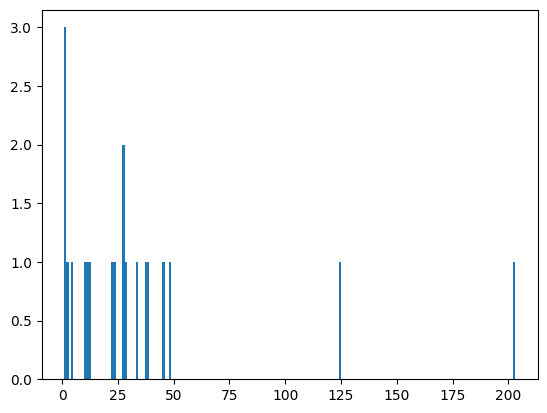

In [81]:
plt.hist(freq1, bins=np.arange(freq1.min(), freq1.max()+1))

In [95]:
import seaborn as sns
import pandas as pd
index=[]
for k in range(len(clusters)):
  index.append(k)
df = pd.DataFrame(list(zip(index,freq)))
#ax = sns.countplot(x="cluster",data=df)

df

,0,1
0,0,203
1,1,23
2,2,27
3,3,11
4,4,1
5,5,33
6,6,22
7,7,45
8,8,124
9,9,12


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['cluster'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['frequency'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['cluster'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['frequency'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['cluster', 'frequency']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['cluster', 'frequency', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['cluster', 'count()', None], **{})
chart

In [97]:
df.columns=['cluster','frequency']
df

,cluster,frequency
0,0,203
1,1,23
2,2,27
3,3,11
4,4,1
5,5,33
6,6,22
7,7,45
8,8,124
9,9,12


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['cluster'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['frequency'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['cluster'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['frequency'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['cluster', 'frequency']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['cluster', 'frequency', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['cluster', 'count()', None], **{})
chart